In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Data/Titanic-Dataset.csv',usecols=['Age','Fare','Survived'])

In [3]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
df.isnull().mean() * 100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [5]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [7]:
X_train

,Age,Fare
30,40.0,27.7208
10,4.0,16.7000
873,47.0,9.0000
182,9.0,31.3875
876,20.0,9.8458
...,...,...
534,30.0,8.6625
584,NaN,8.7125
493,71.0,49.5042
527,NaN,221.7792


In [8]:
X_train['Age_imputed'] = X_train['Age']
X_test['Age_imputed'] = X_test['Age']

In [9]:
X_test.tail()

,Age,Fare,Age_imputed
89,24.0,8.0500,24.0
80,22.0,9.0000,22.0
846,NaN,69.5500,NaN
870,26.0,7.8958,26.0
251,29.0,10.4625,29.0


In [19]:
mask_train = X_train['Age_imputed'].isnull()
X_train.loc[mask_train, 'Age_imputed'] = X_train['Age'].dropna().sample(mask_train.sum(), replace=True).values
mask_test = X_test['Age_imputed'].isnull()
X_test.loc[mask_test, 'Age_imputed'] = X_train['Age'].dropna().sample(mask_test.sum(), replace=True).values


In [20]:
X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values

array([50. ,  4. , 32. , 17. , 18. ,  4. , 58. , 41. , 30. , 26. , 28. ,
       27. , 36. ,  2. , 22. , 28. , 38. , 19. ,  4. , 46. , 24. , 21. ,
       27. , 28. , 38. , 23. , 18. , 34. , 23. , 24. , 38. , 31. , 15. ,
       30. ,  9. ,  2. , 16. , 21. , 23. , 61. , 43. , 42. , 25. , 11. ,
       17. , 43. , 64. ,  8. , 42. , 22. , 19. , 36. , 23. , 51. ,  9. ,
       70.5, 56. , 21. , 44. , 36. , 34. ,  7. , 31. , 28. , 32.5, 36. ,
       39. , 35. , 30. ,  5. , 45.5, 40.5, 49. , 20. , 30. ,  9. , 56. ,
       22. , 22. , 39. , 19. , 45. , 62. , 20. , 31. , 10. , 71. , 29. ,
       23. , 42. , 16. , 51. ,  1. , 26. , 29. , 35. , 21. , 24. , 43. ,
       45. , 13. , 14. , 21. , 36. , 18. , 19. ,  9. , 24. ,  6. , 35. ,
       21. , 25. , 19. , 61. , 28. , 34. , 25. , 39. , 16. , 39. , 40. ,
       32. , 33. , 18. , 26. , 20. , 22. , 50. , 52. , 28. , 42. , 33. ,
       17. , 26. , 37. , 23. , 30. , 48. , 28. , 16. , 28. , 30. , 38. ,
        7. , 40. , 65. , 26. , 33. ])

In [21]:
X_train['Age'].isnull().sum()

np.int64(148)

In [22]:
X_train

,Age,Fare,Age_imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0
...,...,...,...
534,30.0,8.6625,30.0
584,NaN,8.7125,27.0
493,71.0,49.5042,71.0
527,NaN,221.7792,29.0


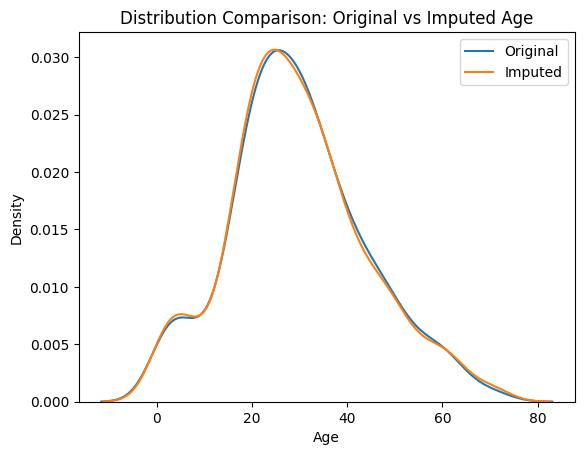

In [23]:
sns.kdeplot(X_train['Age'], label='Original', fill=False)
sns.kdeplot(X_train['Age_imputed'], label='Imputed', fill=False)

plt.legend()
plt.title('Distribution Comparison: Original vs Imputed Age')
plt.show()

In [15]:
print('Original variable variance: ', X_train['Age'].var())
print('Variance after random imputation: ', X_train['Age_imputed'].var())

Original variable variance:  204.34951339046142
Variance after random imputation:  208.7865072628755


In [16]:
X_train[['Fare', 'Age', 'Age_imputed']].cov()

,Fare,Age,Age_imputed
Fare,2368.246832,71.512440,60.819068
Age,71.512440,204.349513,204.349513
Age_imputed,60.819068,204.349513,208.786507


<Axes: >

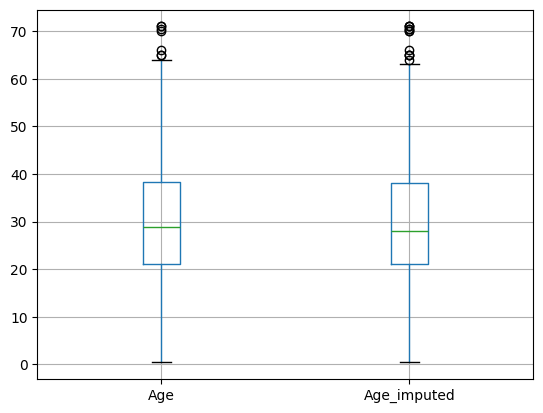

In [17]:
X_train[['Age', 'Age_imputed']].boxplot()

In [24]:
observation = X_test.iloc[0]  # or any specific row
sampled_value = X_train['Age'].dropna().sample(1, random_state=int(observation['Fare']))


In [25]:
data = pd.read_csv('Data/house-train.csv',usecols=['GarageQual','FireplaceQu', 'SalePrice'])

In [26]:
data.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [27]:
data.isnull().mean() * 100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [28]:
X = data
y = data['SalePrice']

In [29]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [30]:
X_train['GarageQual_imputed'] = X_train['GarageQual']
X_test['GarageQual_imputed'] = X_test['GarageQual']

X_train['FireplaceQu_imputed'] = X_train['FireplaceQu']
X_test['FireplaceQu_imputed'] = X_test['FireplaceQu']

In [31]:
X_train.sample(5)

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
1258,NaN,TA,190000,TA,NaN
178,Gd,TA,501837,TA,Gd
934,Gd,TA,242000,TA,Gd
109,TA,TA,190000,TA,TA
289,NaN,TA,153575,TA,NaN


In [33]:
# GarageQual - X_train
mask_train_gq = X_train['GarageQual_imputed'].isnull()
X_train.loc[mask_train_gq, 'GarageQual_imputed'] = (
    X_train['GarageQual'].dropna()
    .sample(mask_train_gq.sum(), replace=True).values
)

# GarageQual - X_test
mask_test_gq = X_test['GarageQual_imputed'].isnull()
X_test.loc[mask_test_gq, 'GarageQual_imputed'] = (
    X_train['GarageQual'].dropna()
    .sample(mask_test_gq.sum(), replace=True).values
)

# FireplaceQu - X_train
mask_train_fq = X_train['FireplaceQu_imputed'].isnull()
X_train.loc[mask_train_fq, 'FireplaceQu_imputed'] = (
    X_train['FireplaceQu'].dropna()
    .sample(mask_train_fq.sum(), replace=True).values
)

# FireplaceQu - X_test
mask_test_fq = X_test['FireplaceQu_imputed'].isnull()
X_test.loc[mask_test_fq, 'FireplaceQu_imputed'] = (
    X_train['FireplaceQu'].dropna()
    .sample(mask_test_fq.sum(), replace=True).values
)


In [34]:
temp = pd.concat(
        [
            X_train['GarageQual'].value_counts() / len(X_train['GarageQual'].dropna()),
            X_train['GarageQual_imputed'].value_counts() / len(X_train)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

In [35]:
temp

,original,imputed
TA,0.951043,0.947774
Fa,0.037171,0.040240
Gd,0.009973,0.009418
Po,0.000907,0.000856
Ex,0.000907,0.001712


In [36]:
temp = pd.concat(
        [
            X_train['FireplaceQu'].value_counts() / len(X_train['FireplaceQu'].dropna()),
            X_train['FireplaceQu_imputed'].value_counts() / len(df)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

temp

,original,imputed
Gd,0.494272,0.653199
TA,0.412439,0.533109
Fa,0.040917,0.053872
Po,0.027823,0.038159
Ex,0.024550,0.032548


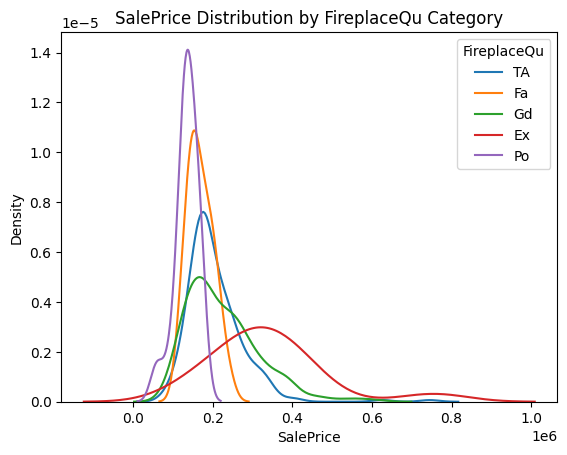

In [38]:
for category in X_train['FireplaceQu'].dropna().unique():
    sns.kdeplot(
        data=X_train[X_train['FireplaceQu'] == category],
        x='SalePrice',
        label=category,
        fill=False  # Set to True if you want filled curves
    )

plt.title('SalePrice Distribution by FireplaceQu Category')
plt.xlabel('SalePrice')
plt.ylabel('Density')
plt.legend(title='FireplaceQu')
plt.show()

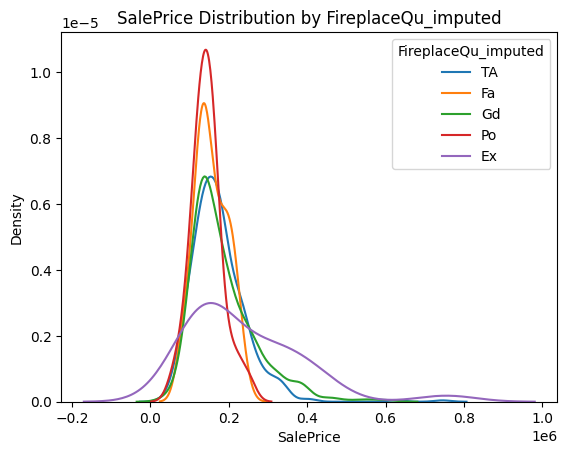

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

for category in X_train['FireplaceQu_imputed'].dropna().unique():
    sns.kdeplot(
        data=X_train[X_train['FireplaceQu_imputed'] == category],
        x='SalePrice',
        label=category,
        fill=False  # Set to True for shaded areas under the curve
    )

plt.title('SalePrice Distribution by FireplaceQu_imputed')
plt.xlabel('SalePrice')
plt.ylabel('Density')
plt.legend(title='FireplaceQu_imputed')
plt.show()
